In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

In [2]:
df = pd.read_csv("../Data/Final-File-in-use.csv")
df.drop(columns=["DateTime"],inplace=True)

In [3]:
df.dropna(inplace=True)
df

,Bx,By,Bz,a,b,c,d,e,f,g,...,ap,aq,ar,as,at,au,av,aw,ax,Kp
0,-2.70274,4.512360,-1.458060,43.044500,0.231726,0.231726,0.818269,22.607500,0.231726,0.231726,...,322.576,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.333
1,-3.50988,3.289230,0.955087,13.476300,0.231726,0.231726,1.191370,3.023420,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3.000
2,-4.19601,1.132740,-2.288890,1.704520,0.231726,0.231726,0.678223,0.231726,0.231726,0.293537,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.000
3,-3.82492,2.546540,-1.199600,15.709700,0.231726,0.231726,0.585838,1.713000,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.667
4,-4.00157,1.301630,2.074150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,4.44582,0.074414,-1.342450,1.404280,0.231726,0.761706,0.231726,0.231726,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.667
972,4.05329,-0.609750,2.693050,1.196930,0.231726,0.429790,0.231726,0.231726,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.000
973,3.60467,2.521510,1.767770,1.237600,0.231726,0.369987,0.231726,0.231726,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.000
974,4.78423,0.161718,-1.606930,0.231726,0.231726,0.582688,5.535300,8.985620,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.667


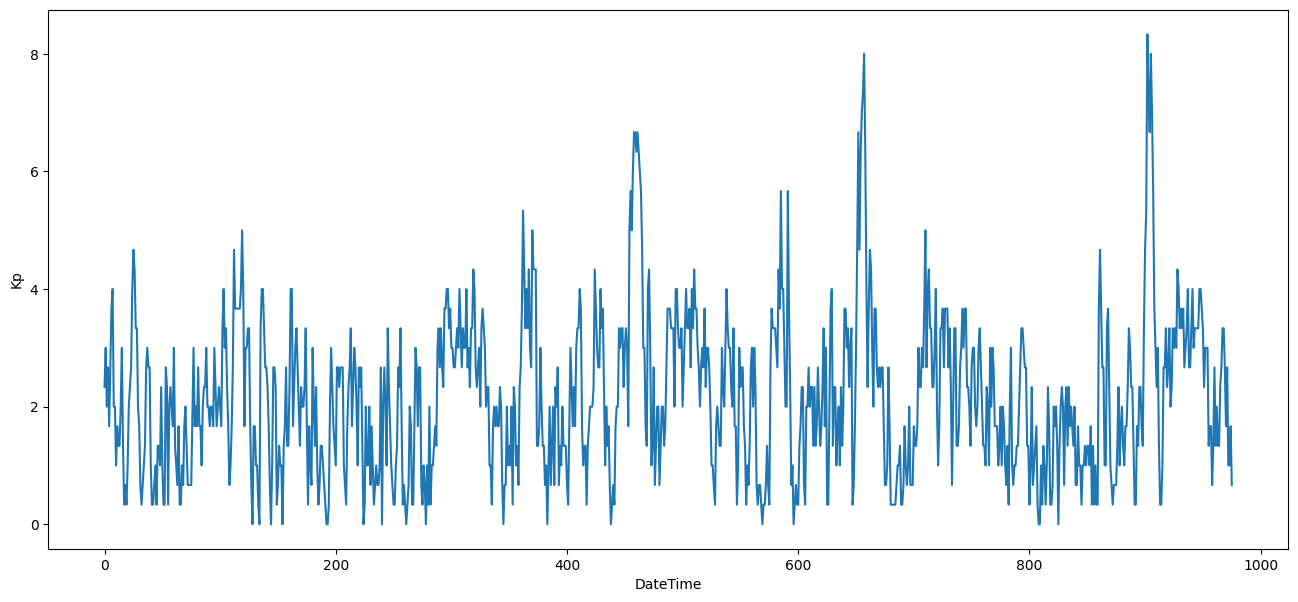

In [4]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel("DateTime")
ax1.set_ylabel("Kp")
ax1.plot(df['Kp'])


In [5]:
Xtrain = df.iloc[:700,:]
Xtest = df.iloc[700:,:]

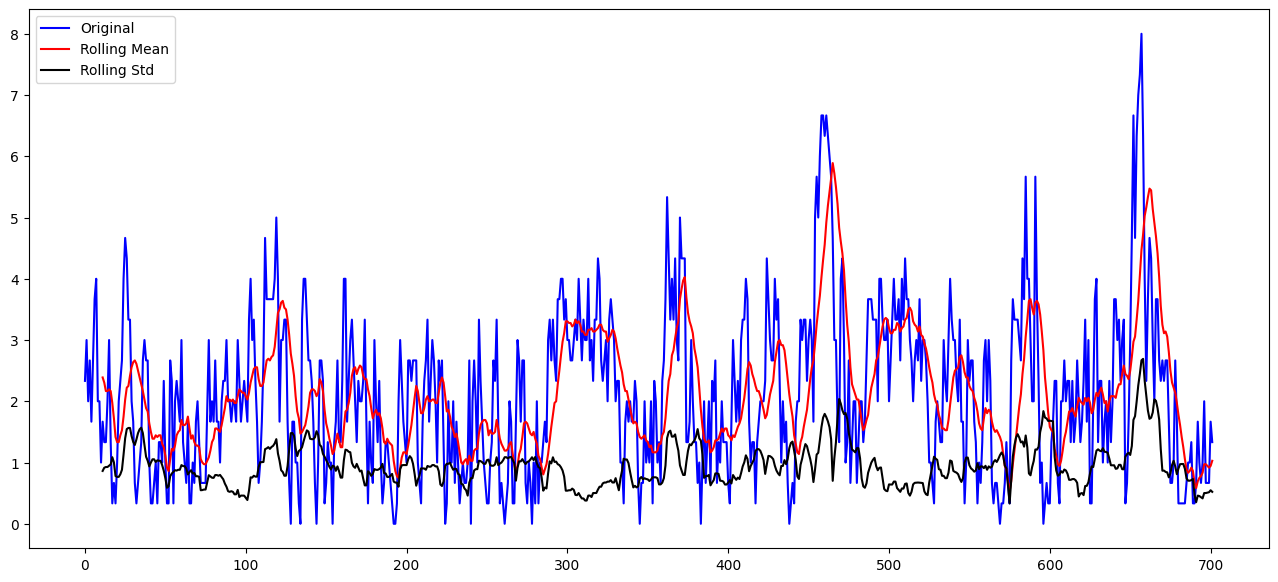

In [6]:
rollmean = Xtrain['Kp'].rolling(12).mean()
rollstd  =Xtrain['Kp'].rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure
orig = plt.plot(Xtrain['Kp'], color= 'blue', label = 'Original')
mean = plt.plot(rollmean, color= 'red', label = 'Rolling Mean')
std = plt.plot(rollstd, color= 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.show(block=False)

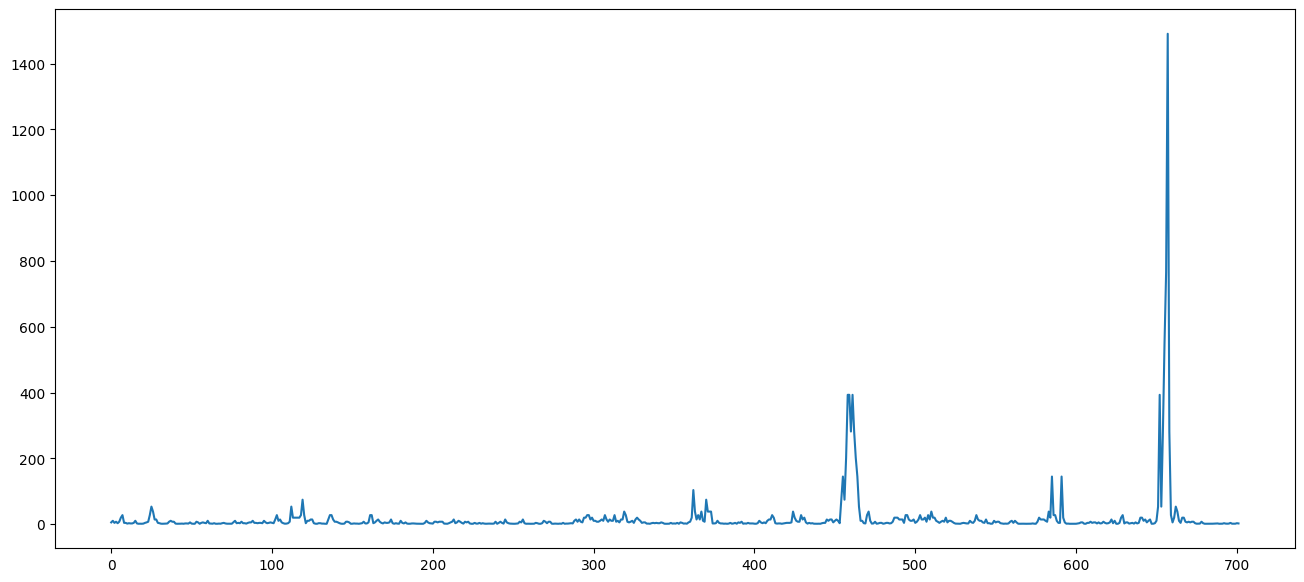

In [7]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.cosh(Xtrain['Kp'])
plt.plot(ts_log)

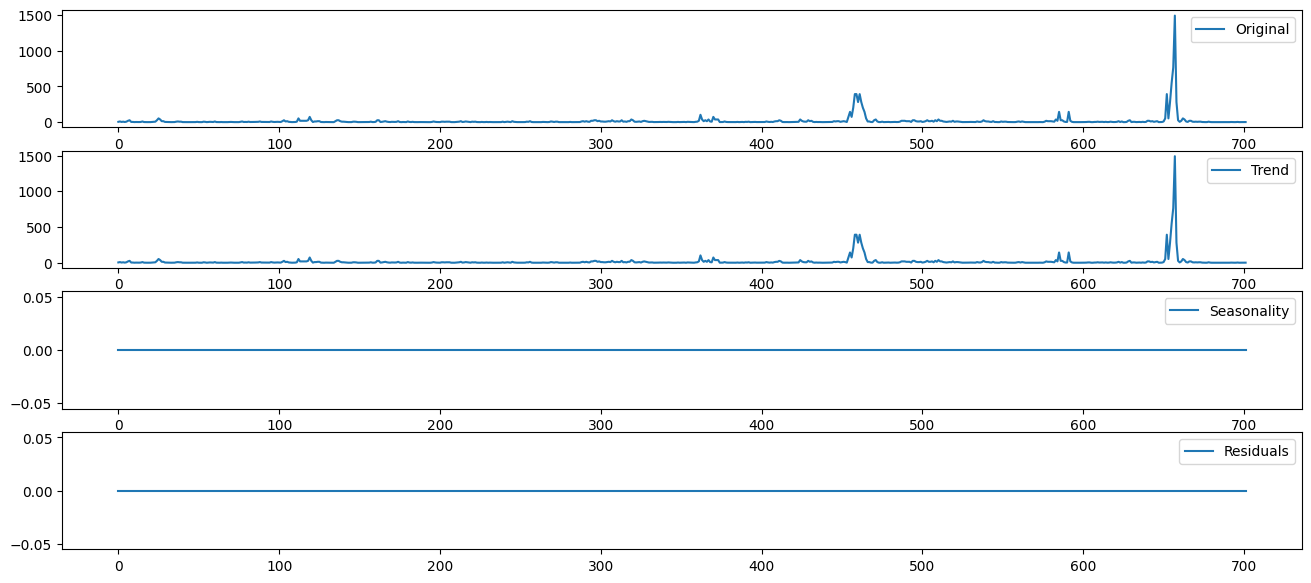

In [8]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=1, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

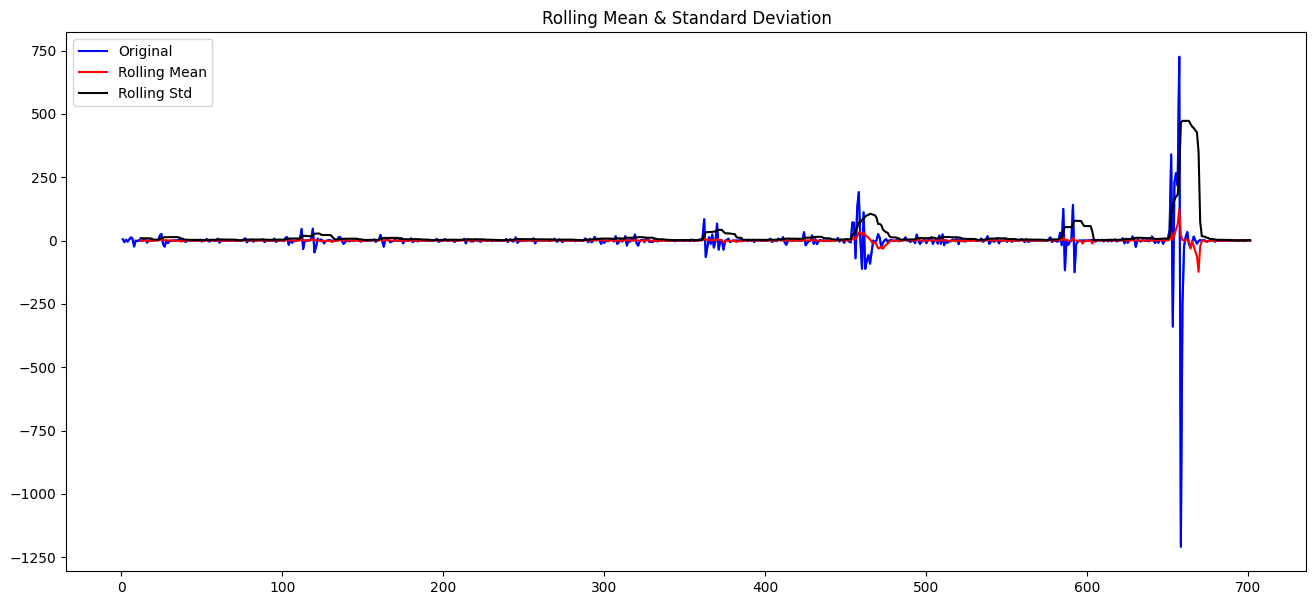

In [9]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
Xtrain['Kp'].sort_index(inplace=True)

In [11]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

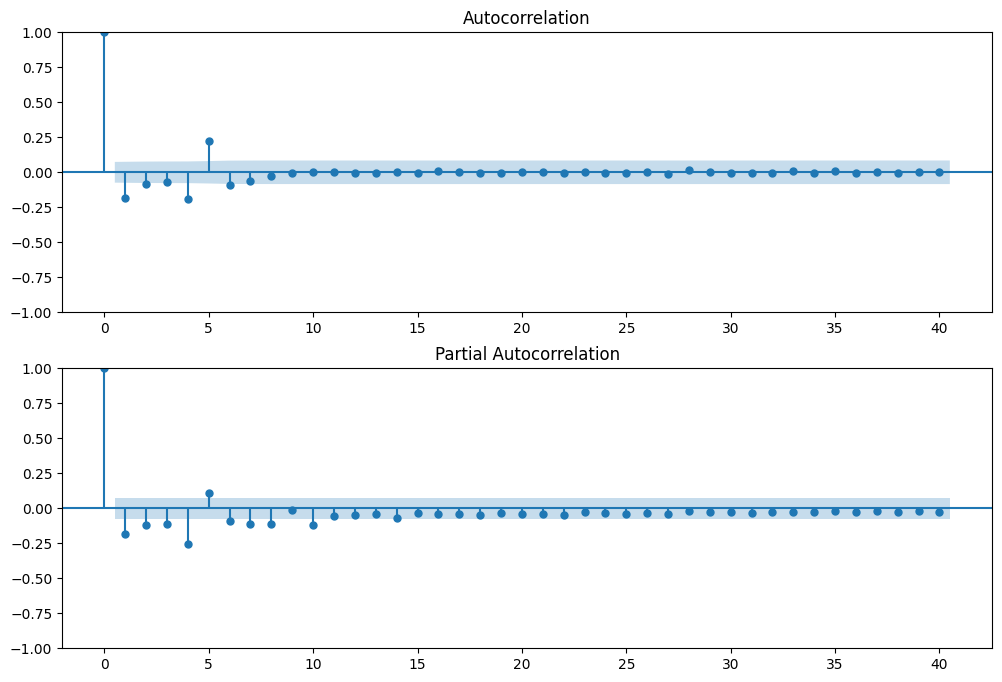

In [12]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
type(ts_log_diff)

pandas.core.series.Series

In [15]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

/home/harsh/anaconda3/envs/nasa/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/harsh/anaconda3/envs/nasa/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/harsh/anaconda3/envs/nasa/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


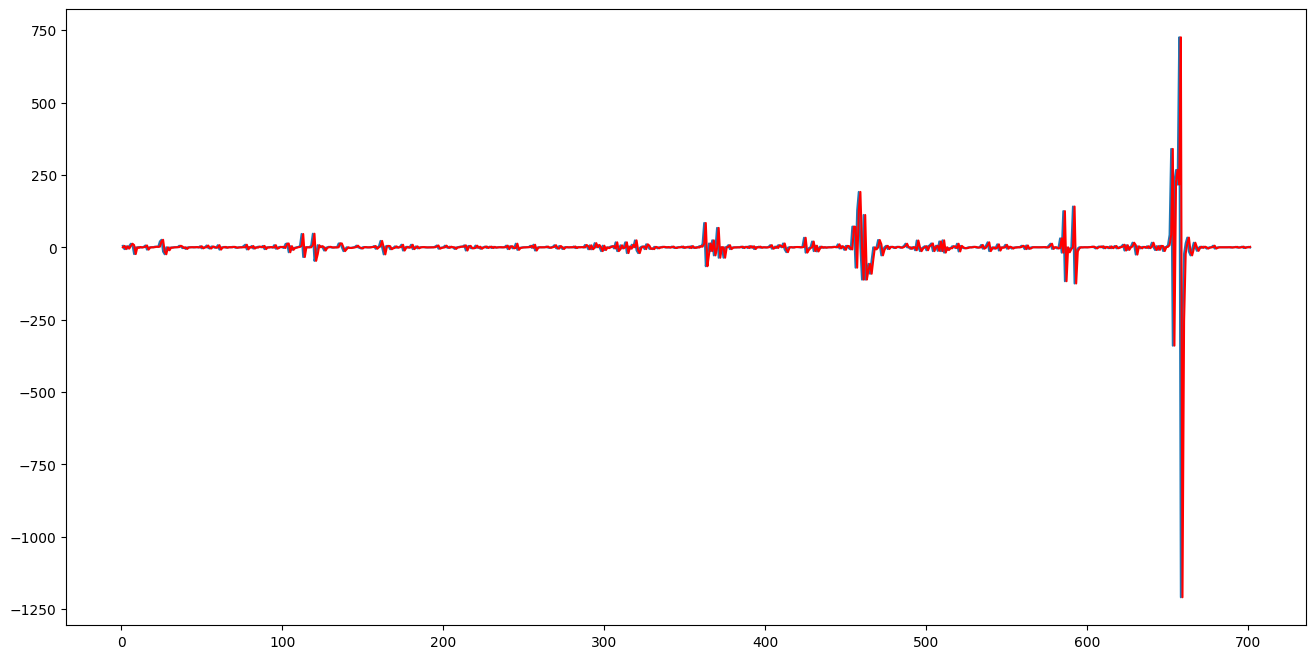

In [16]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(0,1,0))  #0,1,0 best  - cosh then arcsinh 53.45
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [17]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

1    0.000000
2    4.864749
3   -6.305466
4    3.470892
5   -4.490553
dtype: float64


In [18]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

1    0.000000
2    4.864749
3   -1.440717
4    2.030174
5   -2.460379
dtype: float64


In [19]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

0     5.202913
1     5.202913
2    10.067662
3     3.762196
4     7.233087
dtype: float64

Text(0.5, 1.0, 'RMSE: nan')

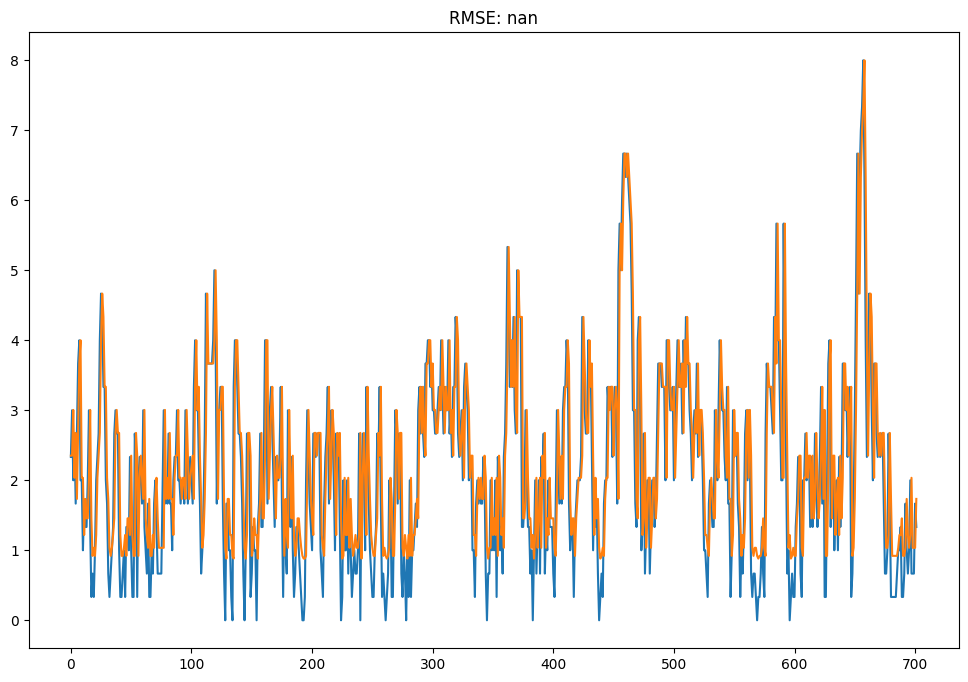

In [20]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.arcsinh(ARIMA_log_prediction)
plt.plot(Xtrain['Kp'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.2f'% np.sqrt(sum((predictions_ARIMA-df['Kp'])**2)/len(df['Kp'])))

In [21]:
# Calculate residuals
residuals = predictions_ARIMA - Xtrain['Kp']

# Calculate total sum of squares
TSS = sum((Xtrain['Kp'] - Xtrain['Kp'].mean())**2)

# Calculate residual sum of squares
RSS = sum(residuals**2)

# Calculate CDTS
CDTS = 1 - (RSS / TSS)

print(f"R^2 Score: {CDTS:.4f}")
    

R^2 Score: 0.5345
